In [1]:
%load_ext autoreload
%autoreload 2

Auto Insurance Prediction of claims 
====================================

***Descartes Underwriting Technical Challenge***

**Author:** *Khaoula Belahsen*

In this notebook, I will go over the steps of my proposed solution for this technical challenge. This will include the following sections : 

    * Goal definition 
    * Getting the data 
    * Data cleaning and processing 
    * Insights and Vizualisation
    * Feature Engineering  
    * Meaningful prediction using Machine Learning 
    * Solution final proposal by giving the csv of prediction on the test dataset

# 1. Goal definition 

The aim of the project is to write structured code in python which provides a step-by-step solution for prediction of a feature TARGET_FLAG, based on a dataset for Car Insurance Claims. I will insist on describing the steps of this data science project, justifying the choices for metric and machine learning algorithm. The delivrables from this project will be a CSV file of predictions and the python code for the project. 

TARGET_FLAG is the indicator of whether an insurance customer will file an insurance claim or not. This is what I am going to predict based on the profile of the customer and their history within the insurance company. 

Through this prediction, insurance companies would have a better understanding of the profile of their clients and adjust their price offer according to the risk engendred by certain customers and policies.

In [2]:
# All the necessary import for the project 

import os 
import numpy as np 
import pandas as pd 
import plotly.express as px 
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns', None)
from scripts.processing import * 
from scripts.plot import * 
import seaborn as sns 
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 2. Getting the data 

The data can be found in the zip file *auto-insurance-fall-2017.zip* . I was provided with 4 csv files : 

    * train_auto.csv and test_auto.csv : are respectively the training and test datasets for this project 
    * MEAN_AUTO.csv and SHELL_AUTO.csv are an example of prediction 

Let's look at the training dataset : 

In [3]:
train_path = r'C:\Users\Asus\Documents\Test Descartes Underwriting\auto-insurance-fall-2017\train_auto.csv'

train_auto = pd.read_csv(train_path)
train_auto.head(3)

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban


Let's also import the test set

In [4]:
test_path = r'C:\Users\Asus\Documents\Test Descartes Underwriting\auto-insurance-fall-2017\test_auto.csv'

test_auto = pd.read_csv(test_path)
test_auto.head(3)

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,M,z_High School,Manager,21,Private,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,z_F,z_High School,z_Blue Collar,30,Commercial,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural


In [5]:
train_auto.shape

(8161, 26)

The train dataset is composed of 8161 samples and 25 features.


In [6]:
train_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   float64
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   object 
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   object 
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   object 
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

After doing some research, here is a summary of the different variables in the dataset, as well as my idea of their interest and impact for this study. 


| Variable | Definition | Type | Effect |
| -:            | -:        |  -:  | -:    |
| INDEX | index of the rows  | -  | I will not use it for my study 
| TARGET_FLAG | 1 or 0 for if the insured made a claim | categorical | target to predict
| PARENT1 | single parents || categorical || describes insured client 
| CAR_USE | type of use ||categorical || most use == more risk ? 
| MSTATUS | marital status ||categorical || stability of insured client 
| RED_CAR | 1 is car is red else 0 || categorical || do red cars cost more ? 
| SEX | gender ||categorical ||gender statistics for accident probability ? 
| REVOKED || of driver's licence was revoked ||categorical ||risk of insured client 
| CAR_TYPE || car type || categorical || effects the claim amount 
| URBANICITY || urban or not || categorical || describes insured client 
| EDUCATION || level of education || categorical/ordinal || describes insured client 
| JOB || job type || categorical ||described insured client 
| INCOME || income in $ ||continuous ||describes insured client 
| HOME_VAL || home value|| continuous ||describes insured client
| TARGET_AMT  || cost of claim ||	continuous || - 
| TRAVTIME || travel time to work || continuous || longer drives == most risk ? 
| BLUEBOOK || value of the car ||continuous || effects the claim amount 
| OLDCLAIM ||amount of past claims ||continuous || effect of this amount on new claim amount 
| TIF || time in force || ordinal ||time that contract is active 
| KIDSDRIV || number of kids driving || ordinal || increased risk with teens driving 
| AGE || age of driver || ordinal ||young and old people increase risk 
| HOMEKIDS || number of kids at home ||ordinal ||describes insured client 
| YOJ || years on job || ordinal || gives idea of insured job stability 
| CLM_FREQ || number of past claims ||ordinal || effects likeliness of new claim
| MVR_PTS || number of points on license || ordinal || 
| CAR_AGE || age of the car || ordinal || effect on new claim 




Let's drop INDEX : 

In [7]:
train_auto.drop(columns=['INDEX'], inplace=True)

# 3. Data Cleaning

## Refactoring the values of some variable : Processing 

For features INCOME, HOME_VAL, BLUEBOOK, OLDCLAIM, we are going to process the dollar amount to turn them into continuous values

In [8]:
money_processing(train_auto, ['INCOME', 'HOME_VAL','BLUEBOOK', 'OLDCLAIM'] )

0

In [9]:
train_auto['MSTATUS'] = train_auto['MSTATUS'].apply(lambda x : x.strip('z_<'))
train_auto['PARENT1'] = train_auto['PARENT1'].apply(lambda x : x.strip('z_<'))
train_auto['URBANICITY'] = train_auto['URBANICITY'].apply(lambda x : x.strip('z_<'))
train_auto['EDUCATION'] = train_auto['EDUCATION'].apply(lambda x : x.strip('z_<'))
train_auto['SEX'] = train_auto['SEX'].apply(lambda x : x.strip('z_<'))
train_auto['CAR_TYPE'] = train_auto['CAR_TYPE'].apply(lambda x : x.strip('z_<'))
train_auto['JOB'] = train_auto['JOB'].apply(lambda x : x.strip('z_<') if type(x)==str else x)


## Handling missing values 

The following features have missing values that will need to be handled prior to a prediction : AGE,YOJ,INCOME,HOME_VAL,JOB, CAR_AGE.

In [10]:
plot_missing_values(train_auto, 'train')
plt.show()

As we can see, the data is pretty complete with 5 variables having about 5-6% missing values. As a first study, I am going to impute those missing values using the following scheme : 

    * JOB : impute with the most common category aka the mode 
    * INCOME, HOME_VAL : impute using the mean value 
    * AGE, YOJ, CAR_AGE : replace with the median value 
    
As an extension, I will later on evaluate using an iterative imputer to look at the whole  dataset in order to complete it. 

In [11]:
train_auto['JOB'].fillna(value=train_auto['JOB'].mode()[0], inplace=True)
replace_with_method(train_auto, ['INCOME', 'HOME_VAL'], 'mean')
replace_with_method(train_auto, ['AGE', 'CAR_AGE', 'YOJ'], 'median')

0

Let's check that the dataset is NA free now 

In [12]:
train_auto.isna().sum()

TARGET_FLAG    0
TARGET_AMT     0
KIDSDRIV       0
AGE            0
HOMEKIDS       0
YOJ            0
INCOME         0
PARENT1        0
HOME_VAL       0
MSTATUS        0
SEX            0
EDUCATION      0
JOB            0
TRAVTIME       0
CAR_USE        0
BLUEBOOK       0
TIF            0
CAR_TYPE       0
RED_CAR        0
OLDCLAIM       0
CLM_FREQ       0
REVOKED        0
MVR_PTS        0
CAR_AGE        0
URBANICITY     0
dtype: int64

In [13]:
plot_missing_values(test_auto, 'test')

0

# 4. Insights and Visualization 

In this section, I'm going to perform a more in deep analysis of the data, through statistics and visualisation in order to better frame the problem that we are trying to solve. 



In [14]:
train_auto.head(3)

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,0.0,0,60.0,0,11.0,67349.0,No,0.0,No,M,PhD,Professional,14,Private,14230.0,11,Minivan,yes,4461.0,2,No,3,18.0,Highly Urban/ Urban
1,0,0.0,0,43.0,0,11.0,91449.0,No,257252.0,No,M,High School,Blue Collar,22,Commercial,14940.0,1,Minivan,yes,0.0,0,No,0,1.0,Highly Urban/ Urban
2,0,0.0,0,35.0,1,10.0,16039.0,No,124191.0,Yes,F,High School,Clerical,5,Private,4010.0,4,SUV,no,38690.0,2,No,3,10.0,Highly Urban/ Urban


Let's first look at the distribution of our variables : 

In [15]:
features_bin = ['TARGET_FLAG', 'PARENT1', 'MSTATUS', 'SEX', 'RED_CAR', 'REVOKED']
features_cat = ['EDUCATION', 'JOB', 'CAR_TYPE', 'URBANICITY','CAR_USE']
features_ord = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'CAR_AGE']
features_con = ['OLDCLAIM', 'BLUEBOOK', 'HOME_VAL', 'INCOME', 'TARGET_AMT']

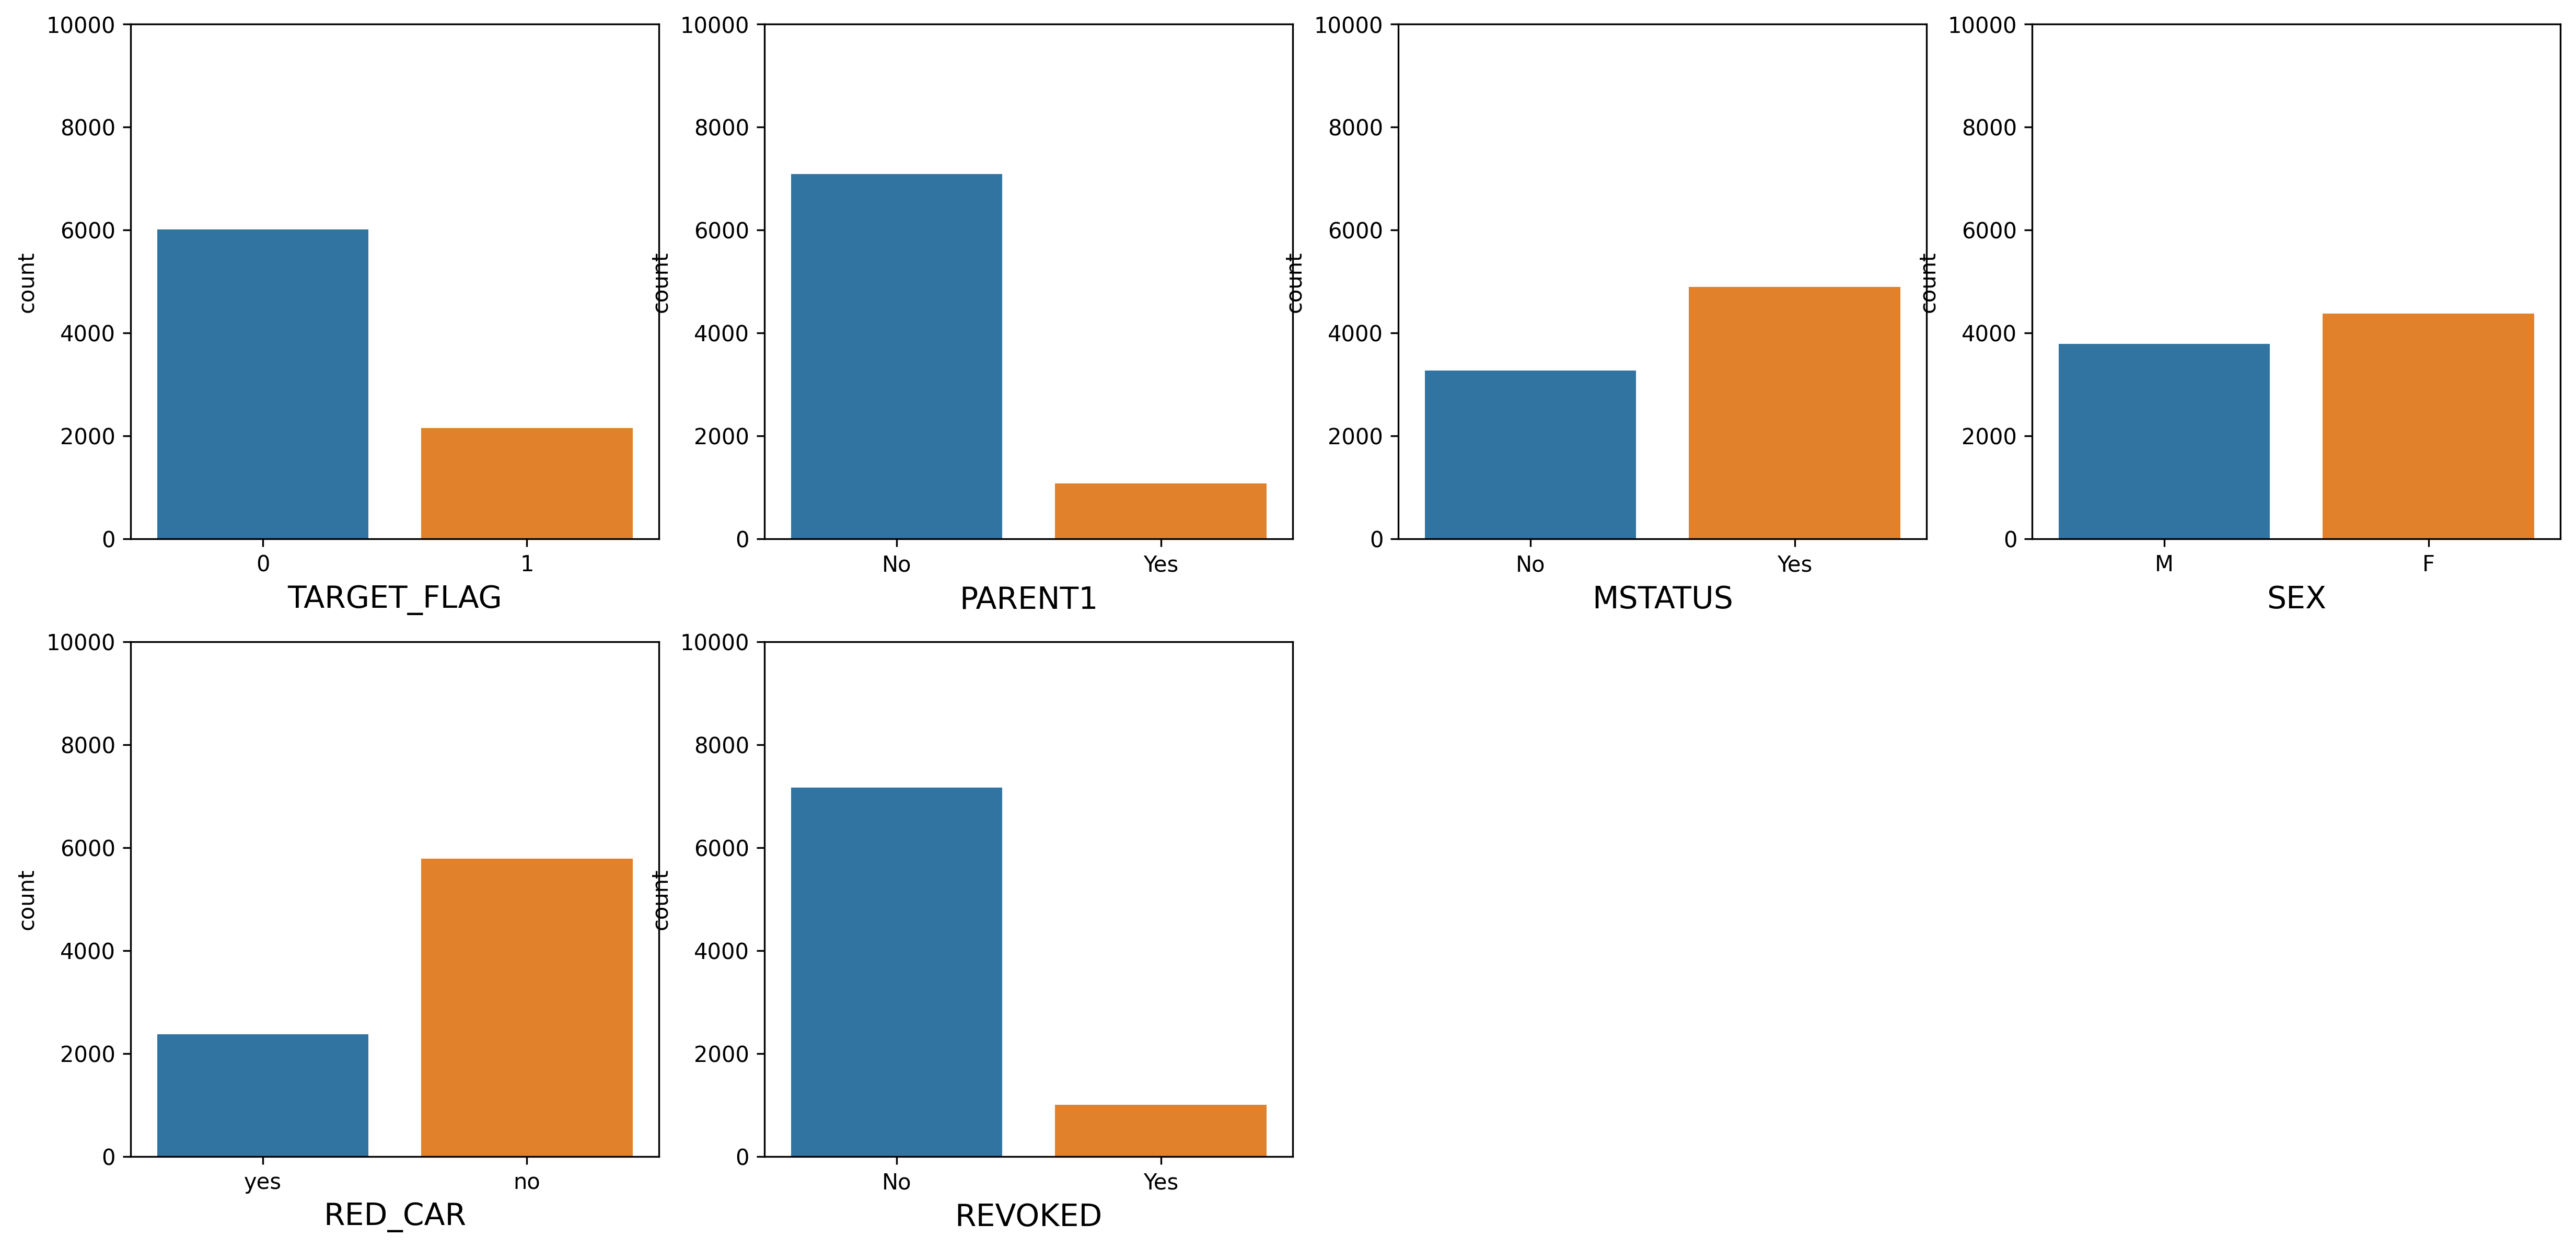

In [16]:
plt.figure(figsize=(20, 20), dpi = 300)
plt.title('Distribution of binary features')

count = 0

for f in (features_bin):
    if  train_auto[f].nunique() <= 2:
        ax = plt.subplot(4, 4, count+1)
        sns.countplot(train_auto[f])
        plt.xlabel(f, fontsize = 14)
        plt.ylim(0, 10000)
        count += 1
plt.savefig('distribution.png')
plt.show()

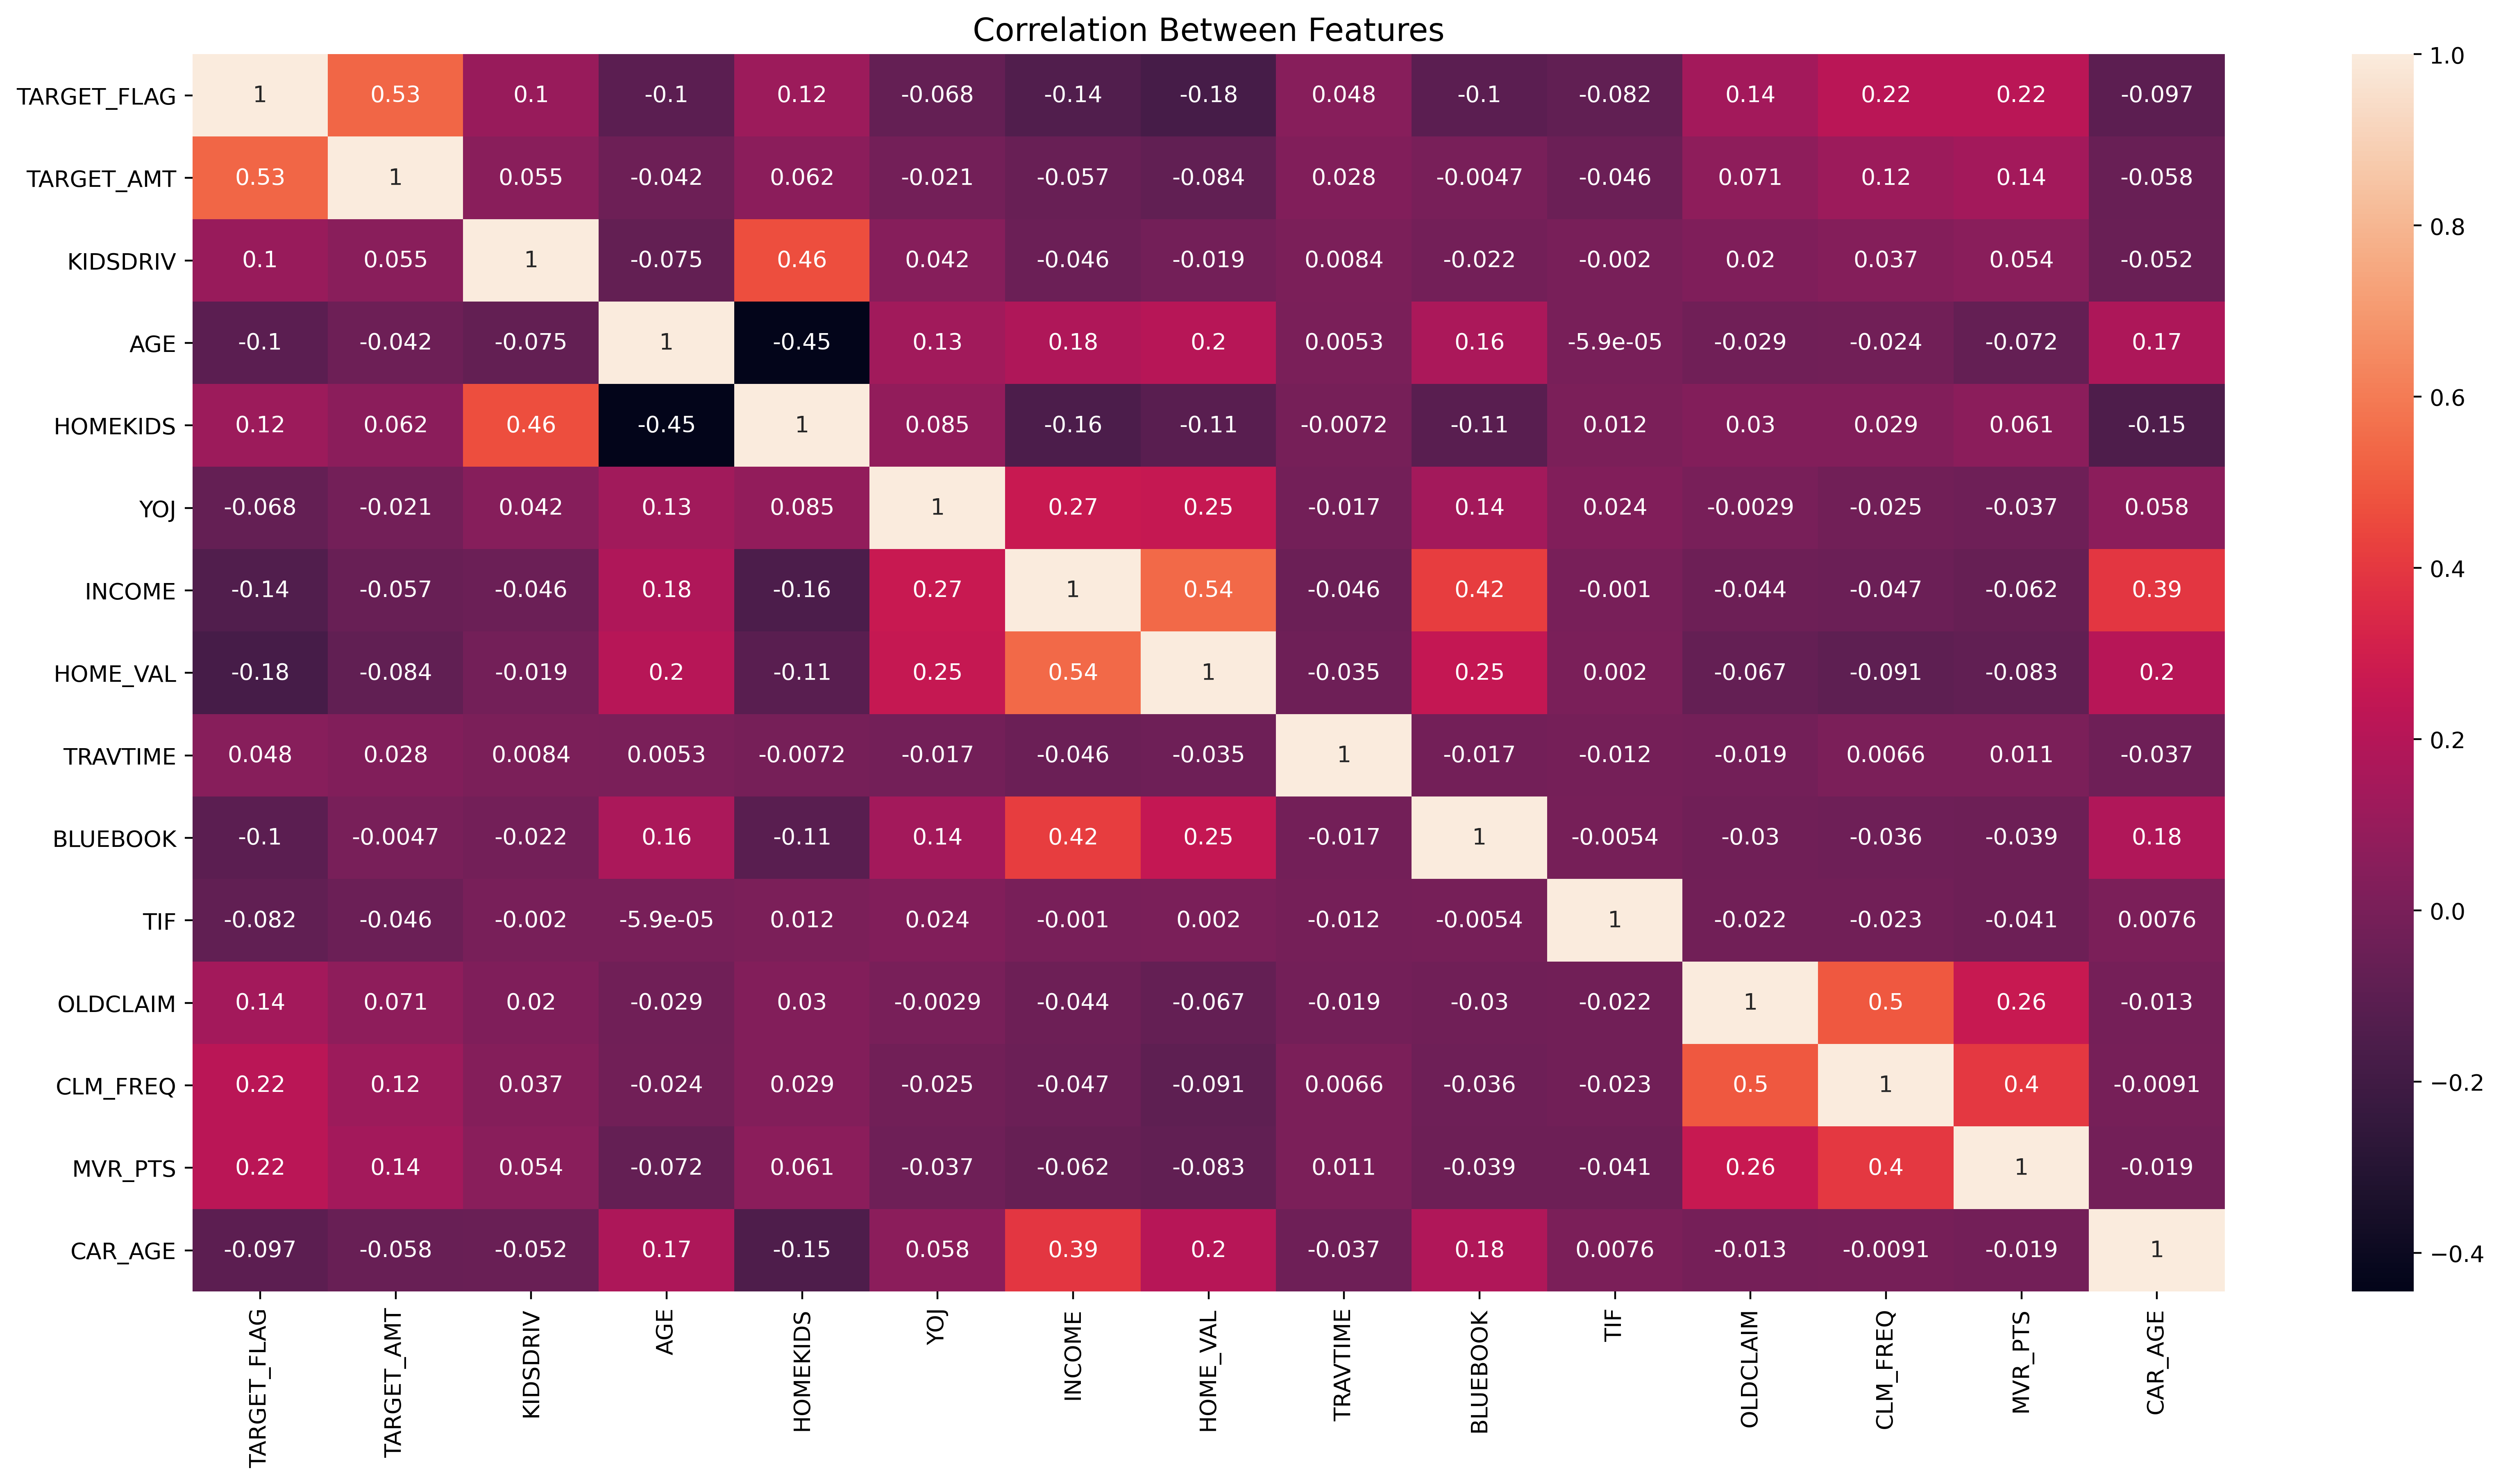

In [17]:
corr = train_auto.corr()

plt.figure(figsize = (20,10), dpi= 400)
sns.heatmap(corr, annot=True)
plt.title("Correlation Between Features", fontsize = 14)
plt.xticks(rotation = 'vertical')
plt.savefig('correlation.png')
plt.show()

# 5. Features Engineering  

For categorical features about CAR_TYPE, URBANICITY... let's create dummy features to better describe them. I previously checked for these variables that there are no different spellings of the same category.

In [18]:
train_auto = get_dummy(train_auto, features_cat)

In [19]:
train_auto.drop(columns=features_cat, inplace=True)

Let's also preprocess binary variables : MSTATUS, SEX, RED_CAR, REVOKED, PARENT1



In [20]:
binary_processing(train_auto)

0

In [21]:
train_auto.head(3)

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,Bachelors,High School,Masters,PhD,Blue Collar,Clerical,Doctor,Home Maker,Lawyer,Manager,Professional,Student,Minivan,Panel Truck,Pickup,SUV,Sports Car,Van,Highly Rural/ Rural,Highly Urban/ Urban,Commercial,Private
0,0,0.0,0,60.0,0,11.0,67349.0,No,0.0,No,M,14,14230.0,11,yes,4461.0,2,No,3,18.0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
1,0,0.0,0,43.0,0,11.0,91449.0,No,257252.0,No,M,22,14940.0,1,yes,0.0,0,No,0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2,0,0.0,0,35.0,1,10.0,16039.0,No,124191.0,Yes,F,5,4010.0,4,no,38690.0,2,No,3,10.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [22]:
for f in features_ord:
    train_auto[f] = train_auto[f].apply(lambda x : int(x))

Let's again take a look at the train_set : 

In [23]:
train_auto.head()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,Bachelors,High School,Masters,PhD,Blue Collar,Clerical,Doctor,Home Maker,Lawyer,Manager,Professional,Student,Minivan,Panel Truck,Pickup,SUV,Sports Car,Van,Highly Rural/ Rural,Highly Urban/ Urban,Commercial,Private
0,0,0.0,0,60,0,11,67349.000000,No,0.0,No,M,14,14230.0,11,yes,4461.0,2,No,3,18,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
1,0,0.0,0,43,0,11,91449.000000,No,257252.0,No,M,22,14940.0,1,yes,0.0,0,No,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2,0,0.0,0,35,1,10,16039.000000,No,124191.0,Yes,F,5,4010.0,4,no,38690.0,2,No,3,10,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,0.0,0,51,0,14,61898.094609,No,306251.0,Yes,M,32,15440.0,7,yes,0.0,0,No,0,6,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,0,0.0,0,50,0,11,114986.000000,No,243925.0,Yes,F,36,18000.0,1,no,19217.0,2,Yes,3,17,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [24]:
train_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   TARGET_FLAG          8161 non-null   int64   
 1   TARGET_AMT           8161 non-null   float64 
 2   KIDSDRIV             8161 non-null   int64   
 3   AGE                  8161 non-null   int64   
 4   HOMEKIDS             8161 non-null   int64   
 5   YOJ                  8161 non-null   int64   
 6   INCOME               8161 non-null   float64 
 7   PARENT1              8161 non-null   category
 8   HOME_VAL             8161 non-null   float64 
 9   MSTATUS              8161 non-null   category
 10  SEX                  8161 non-null   category
 11  TRAVTIME             8161 non-null   int64   
 12  BLUEBOOK             8161 non-null   float64 
 13  TIF                  8161 non-null   int64   
 14  RED_CAR              8161 non-null   category
 15  OLDCLAIM             

## Transforming Numerical Values

['TARGET_AMT', 'INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']


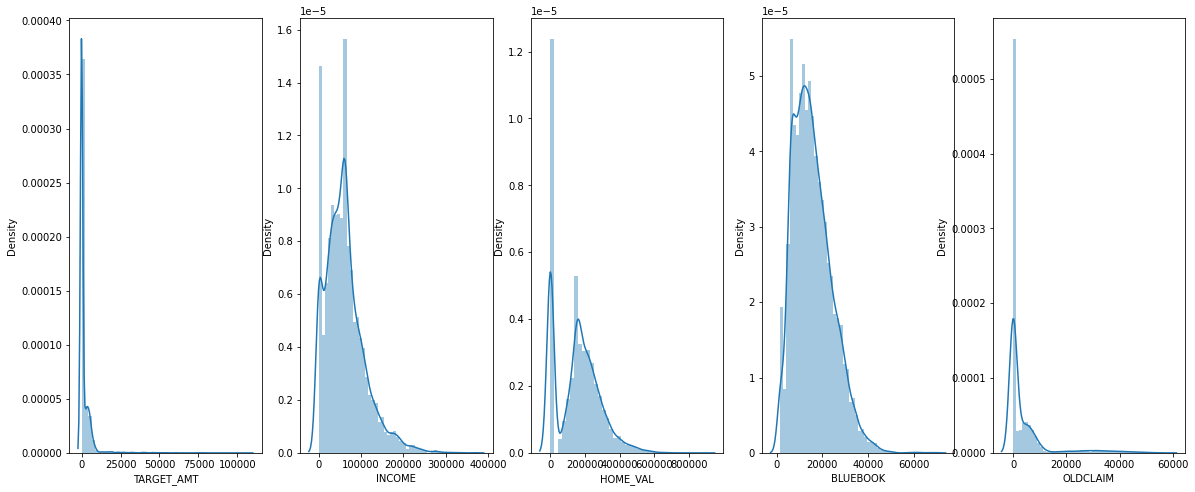

In [25]:
import warnings
warnings.filterwarnings('ignore')

# Create fig object
fig, axes = plt.subplots(1, 5, figsize=(20,8))

numerical_columns = train_auto.select_dtypes(exclude=['category', 'uint8', 'int64']).columns
numerical_columns = list(numerical_columns)
#numerical_columns.remove('TARGET_FLAG')
print(numerical_columns)
# Create a plot for each feature
x,y = 0,0
for i, column in enumerate(numerical_columns):

    sns.distplot(train_auto[column], ax=axes[i])


As we can see, the continuous variables seem to follow normals. As expected, they are way more claims that are not fullfilled than the one fullfilled. Aka more 0 in TARGET_FLAG than 1. We can verify it in the following plot : 

<AxesSubplot:xlabel='TARGET_FLAG', ylabel='count'>

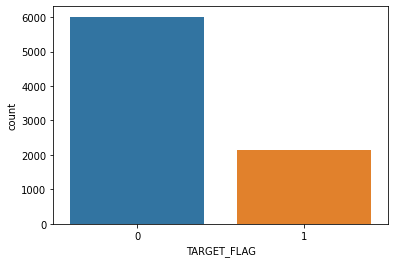

In [26]:
 sns.countplot(train_auto['TARGET_FLAG'])

There's approximately 75% of NON_CLAIMS and 25% of CLAIMS. This should be taken into account in our study. 

## Label Encoding of Binary Variables

In [27]:
cat_columns = train_auto.select_dtypes('category')
cat_columns

,PARENT1,MSTATUS,SEX,RED_CAR,REVOKED
0,No,No,M,yes,No
1,No,No,M,yes,No
2,No,Yes,F,no,No
3,No,Yes,M,yes,No
4,No,Yes,F,no,Yes
...,...,...,...,...,...
8156,No,No,M,yes,No
8157,No,Yes,M,no,No
8158,No,Yes,M,no,No
8159,No,Yes,F,no,No


['TARGET_FLAG', 'PARENT1', 'MSTATUS', 'SEX', 'RED_CAR', 'REVOKED']

In [28]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()

def le_transform(dataset, features): 

  for feature in features :
    train_auto[feature] = le.fit_transform(train_auto[feature])

  return 0



In [29]:
le_transform(train_auto, features_bin)

0

In [30]:
train_auto.head()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,Bachelors,High School,Masters,PhD,Blue Collar,Clerical,Doctor,Home Maker,Lawyer,Manager,Professional,Student,Minivan,Panel Truck,Pickup,SUV,Sports Car,Van,Highly Rural/ Rural,Highly Urban/ Urban,Commercial,Private
0,0,0.0,0,60,0,11,67349.000000,0,0.0,0,1,14,14230.0,11,1,4461.0,2,0,3,18,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
1,0,0.0,0,43,0,11,91449.000000,0,257252.0,0,1,22,14940.0,1,1,0.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2,0,0.0,0,35,1,10,16039.000000,0,124191.0,1,0,5,4010.0,4,0,38690.0,2,0,3,10,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,0.0,0,51,0,14,61898.094609,0,306251.0,1,1,32,15440.0,7,1,0.0,0,0,0,6,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,0,0.0,0,50,0,11,114986.000000,0,243925.0,1,0,36,18000.0,1,0,19217.0,2,1,3,17,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


## Detecting Outliers 

In [31]:
outliers = detect_outlier(train_auto)

Feature: TARGET_AMT, outliers: 1620

Feature: INCOME, outliers: 308

Feature: HOME_VAL, outliers: 19

Feature: BLUEBOOK, outliers: 104

Feature: OLDCLAIM, outliers: 663



In [32]:
#Removing outliers from the data

train = train_auto.drop(train_auto.index[list(outliers)]).reset_index(drop = True)

print('Shape of old data: {}'.format(train_auto.shape))
print('Shape of new data: {}'.format(train.shape))


Shape of old data: (8161, 42)
Shape of new data: (7871, 42)


# 6. Model Prediction 

In this section, I am going to apply a machine learning algorithm in order to classify whether a client is going to file a claim or not. The problem can also be seen predicting the probability that a client will file a claim. 



In [33]:
train.head()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,Bachelors,High School,Masters,PhD,Blue Collar,Clerical,Doctor,Home Maker,Lawyer,Manager,Professional,Student,Minivan,Panel Truck,Pickup,SUV,Sports Car,Van,Highly Rural/ Rural,Highly Urban/ Urban,Commercial,Private
0,0,0.0,0,60,0,11,67349.000000,0,0.0,0,1,14,14230.0,11,1,4461.0,2,0,3,18,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
1,0,0.0,0,43,0,11,91449.000000,0,257252.0,0,1,22,14940.0,1,1,0.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2,0,0.0,0,35,1,10,16039.000000,0,124191.0,1,0,5,4010.0,4,0,38690.0,2,0,3,10,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,0.0,0,51,0,14,61898.094609,0,306251.0,1,1,32,15440.0,7,1,0.0,0,0,0,6,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,0,0.0,0,50,0,11,114986.000000,0,243925.0,1,0,36,18000.0,1,0,19217.0,2,1,3,17,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


First, we are going to split the dataset into train and validation : 

In [34]:
from sklearn.model_selection import train_test_split
#Splitting
X, y = train.drop(['TARGET_FLAG', 'TARGET_AMT'], axis=1), train['TARGET_FLAG'].astype(int)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=101)

## First Model 

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# random forest model creation
rfc = RandomForestClassifier(n_estimators = 25)
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_val)

print(confusion_matrix(y_val,rfc_predict))
print('\n Confusion Matrix RandomForest Classifier')
print(classification_report(y_val,rfc_predict))

[[1656  114]
 [ 426  166]]

 Confusion Matrix RandomForest Classifier
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1770
           1       0.59      0.28      0.38       592

    accuracy                           0.77      2362
   macro avg       0.69      0.61      0.62      2362
weighted avg       0.74      0.77      0.74      2362



In [36]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_val, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_val, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[1656  114]
 [ 426  166]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1770
           1       0.59      0.28      0.38       592

    accuracy                           0.77      2362
   macro avg       0.69      0.61      0.62      2362
weighted avg       0.74      0.77      0.74      2362



=== All AUC Scores ===
[0.7960317  0.78238431 0.80630029 0.81272181 0.76332619 0.78559067
 0.78628326 0.81343225 0.79151786 0.78139443]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7918982777614411


With this prediction, an insurance company will have information about how likely it is for a client to file a claim in the future. This corresponds to a classification of the clients into  **safe clients** which will likely not file a claim (TARGET_FLAG = 0), and **risky clients** which will (TARGET_FLAG = 1). With this prediction, the insurance company can perform budget predictions and tailor the underwriting prices. Therefore, both a good prediction for the 0 class and a good prediction on the 1 class are desirable. I will therefore look at improving the overall values of my AUC_SCORE for this study. 

There is a slight nuance, being that if a risky client is predicted as being safe, the insurance would have to honor his claim once it is filed, whereas the opposite would result in a safe client paying more on his contract. The first case results in a direct loss of money for the insurance company, whereas the second one in a decrease in the client's satisfaction with the contract and therefore in a possible turnover. 


In my cross-validation, I will look at parameters improving the recall aka improving the good prediction on the risky clients (TARGET_FLAG = 1. 

In [37]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='recall')
rfc_cv_score.mean()


0.3290112347294939

## Hyperparameters tuning with CV 

In [38]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(2*x) for x in list(range(1,20))]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(10*x) for x in list(range(1,50)) ]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring='recall')
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 38, 'max_features': 'sqrt', 'max_depth': 420}


In [39]:
rfc_final  = RandomForestClassifier(n_estimators=128, max_depth=150, max_features='auto')
rfc_final.fit(X_train,y_train)
rfc_predict = rfc_final.predict(X_val)
rfc_cv_score = cross_val_score(rfc_final, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_val, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_val, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[1689   81]
 [ 426  166]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1770
           1       0.67      0.28      0.40       592

    accuracy                           0.79      2362
   macro avg       0.74      0.62      0.63      2362
weighted avg       0.77      0.79      0.75      2362



=== All AUC Scores ===
[0.81794865 0.78869602 0.82155908 0.84025264 0.79292579 0.80701184
 0.81745448 0.84146971 0.80314688 0.80194765]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8132412760780768


The recal on the class 1 could be improved. This model has a good AUC score of 0.813. I'm going to move forward with this model for now.

In [40]:
features = train_auto.columns

importances = rfc_final.feature_importances_
indices = np.argsort(importances)

# plt.title('Feature Importances')
# plt.bar(range(len(indices)), importances[indices], color='b', align='center')
# plt.xticks(range(len(indices)), [features[i] for i in indices])
# plt.ylabel('Relative Importance')
# plt.show()

feat_importance = pd.DataFrame({'variable' : [features[i] for i in indices] 
, 'importance' : importances[indices]})
feat_importance = feat_importance[~feat_importance['variable'].isin(['TARGET_AMT', 'TARGET_FLAG'])]
fig = px.bar(feat_importance, y='importance', x='variable', orientation='v', title= 'Relative importance of features '.format(type=type))
fig.show()


The features with the most relative importance seem to be : SEX, HOMEKIDS, past claims (CLM_FREQ), INCOME, TIF, MSTATUS and AGE. If we refer back to the variable table I presented above, we can infer the signification of this effect. 

# 7. Prediction on test data 

Now let's move with this model to the prediction on the test data 

## Processing 

In [41]:
test_auto.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,M,z_High School,Manager,21,Private,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,z_F,z_High School,z_Blue Collar,30,Commercial,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,z_No,M,z_High School,Clerical,74,Private,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,z_No,M,z_High School,Manager,45,Private,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [42]:
test_auto['PARENT1'] = test_auto['PARENT1'].apply(lambda x : x.strip('z_<'))
test_auto['URBANICITY'] = test_auto['URBANICITY'].apply(lambda x : x.strip('z_<'))
test_auto['EDUCATION'] = test_auto['EDUCATION'].apply(lambda x : x.strip('z_<'))
test_auto['SEX'] = test_auto['SEX'].apply(lambda x : x.strip('z_<'))
test_auto['CAR_TYPE'] = test_auto['CAR_TYPE'].apply(lambda x : x.strip('z_<'))
test_auto['JOB'] = test_auto['JOB'].apply(lambda x : x.strip('z_<') if type(x)==str else x)
test_auto['MSTATUS'] = test_auto['MSTATUS'].apply(lambda x : x.strip('z_<') if type(x)==str else x)


In [43]:

test_auto = full_processing(test_auto)
test_auto.drop(columns=features_cat, inplace=True)


In [44]:
test_auto.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,Highly Rural/ Rural,Highly Urban/ Urban,Minivan,Panel Truck,Pickup,SUV,Sports Car,Van,Commercial,Private,Blue Collar,Clerical,Doctor,Home Maker,Lawyer,Manager,Professional,Student,Bachelors,High School,Masters,PhD
0,3,NaN,NaN,0,48.0,0,11.0,52881.0,No,0.0,No,M,26,21970.0,1,yes,0.0,0,No,2,10.0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,9,NaN,NaN,1,40.0,1,11.0,50815.0,Yes,0.0,No,M,21,18930.0,6,no,3295.0,1,No,2,1.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,10,NaN,NaN,0,44.0,2,12.0,43486.0,Yes,0.0,No,F,30,5900.0,10,no,0.0,0,No,0,10.0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,18,NaN,NaN,0,35.0,2,NaN,21204.0,Yes,0.0,No,M,74,9230.0,6,no,0.0,0,Yes,0,4.0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,21,NaN,NaN,0,59.0,0,12.0,87460.0,No,0.0,No,M,45,15420.0,1,yes,44857.0,2,No,4,1.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [45]:
test_auto.isna().sum()

INDEX                     0
TARGET_FLAG            2141
TARGET_AMT             2141
KIDSDRIV                  0
AGE                       1
HOMEKIDS                  0
YOJ                      94
INCOME                  125
PARENT1                   0
HOME_VAL                111
MSTATUS                   0
SEX                       0
TRAVTIME                  0
BLUEBOOK                  0
TIF                       0
RED_CAR                   0
OLDCLAIM                  0
CLM_FREQ                  0
REVOKED                   0
MVR_PTS                   0
CAR_AGE                 129
Highly Rural/ Rural       0
Highly Urban/ Urban       0
Minivan                   0
Panel Truck               0
Pickup                    0
SUV                       0
Sports Car                0
Van                       0
Commercial                0
Private                   0
Blue Collar               0
Clerical                  0
Doctor                    0
Home Maker                0
Lawyer              

In [46]:
replace_with_method(test_auto, ['INCOME', 'HOME_VAL'], 'mean')
replace_with_method(test_auto, ['CAR_AGE', 'YOJ', 'AGE'], 'median')

0

In [47]:
test_auto.isna().sum()

INDEX                     0
TARGET_FLAG            2141
TARGET_AMT             2141
KIDSDRIV                  0
AGE                       0
HOMEKIDS                  0
YOJ                       0
INCOME                    0
PARENT1                   0
HOME_VAL                  0
MSTATUS                   0
SEX                       0
TRAVTIME                  0
BLUEBOOK                  0
TIF                       0
RED_CAR                   0
OLDCLAIM                  0
CLM_FREQ                  0
REVOKED                   0
MVR_PTS                   0
CAR_AGE                   0
Highly Rural/ Rural       0
Highly Urban/ Urban       0
Minivan                   0
Panel Truck               0
Pickup                    0
SUV                       0
Sports Car                0
Van                       0
Commercial                0
Private                   0
Blue Collar               0
Clerical                  0
Doctor                    0
Home Maker                0
Lawyer              

In [49]:
features_bin.remove('TARGET_FLAG')

for feature in features_bin : 
 test_auto[feature] = test_auto[feature].cat.codes



In [50]:
for f in features_ord:
    test_auto[f] = test_auto[f].apply(lambda x : int(x))

In [51]:
test_auto.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,Highly Rural/ Rural,Highly Urban/ Urban,Minivan,Panel Truck,Pickup,SUV,Sports Car,Van,Commercial,Private,Blue Collar,Clerical,Doctor,Home Maker,Lawyer,Manager,Professional,Student,Bachelors,High School,Masters,PhD
0,3,NaN,NaN,0,48,0,11,52881.0,0,0.0,0,1,26,21970.0,1,1,0.0,0,0,2,10,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,9,NaN,NaN,1,40,1,11,50815.0,1,0.0,0,1,21,18930.0,6,0,3295.0,1,0,2,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,10,NaN,NaN,0,44,2,12,43486.0,1,0.0,0,0,30,5900.0,10,0,0.0,0,0,0,10,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,18,NaN,NaN,0,35,2,11,21204.0,1,0.0,0,1,74,9230.0,6,0,0.0,0,1,0,4,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,21,NaN,NaN,0,59,0,12,87460.0,0,0.0,0,1,45,15420.0,1,1,44857.0,2,0,4,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


## Prediction and Submission 

In [52]:
# Test data for submission

test_x = test_auto.drop(['TARGET_FLAG', 'TARGET_AMT', 'INDEX'], axis=1)

# Performing predictions

test_pred = rfc_final.predict(test_x)
submission = pd.DataFrame({'INDEX': test_auto["INDEX"], 'TARGET_FLAG': test_pred})
print(submission.head(10))

   INDEX  TARGET_FLAG
0      3            0
1      9            1
2     10            0
3     18            0
4     21            0
5     30            0
6     31            0
7     37            0
8     39            0
9     47            0


In [53]:
submission.to_csv('submission.csv', index=False)

# 8. Further Work and Improvements 

Here are some ideas that I was not able to complete on time for this challenge : 

- On the data processing : 

    - Improve feature engineering and selection : by looking at colinearity between variables, normalization.. I didn't do it as it's not required with random forest. 
    - Use more intelligent missing values imputation such as KNN (I had only 5% data so I didn't take it into account at first)

- On the resolution of the problem  : 

    - Try other machine learning models 

    - Perform complementary analysis on the random forest model by identifying variables importance, looking at the distribution of variables for each of the predicted classes. 

    - Using this class prediction in order to also predict the claim amounts. 

    - include the cost of falsely predicting 0 (for example the average of the claim amount) as weights on the classes. 

